In [3]:
import assignment1 as a1
import utilities as utl
import scipy
import numpy as np
import matplotlib.pyplot as plt

from utilities import polynomial_regression

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
(countries, features, values) = a1.load_unicef_data()

targets = values[:,1]
x = values[:,7:]
# x = a1.normalize_data(x)


N_TRAIN = 100;
x_train = x[0:N_TRAIN,:]
x_test = x[N_TRAIN:,:]
t_train = targets[0:N_TRAIN]
t_test = targets[N_TRAIN:]

In [5]:
train_err = dict()
test_err = dict()
for i in xrange(7, 15):
    w, err_train, err_test =  polynomial_regression(x_train[:, i-7], t_train, x_test[:, i-7], t_test, degree=3)
    train_err[i+1] = err_train
    test_err[i+1] = err_test

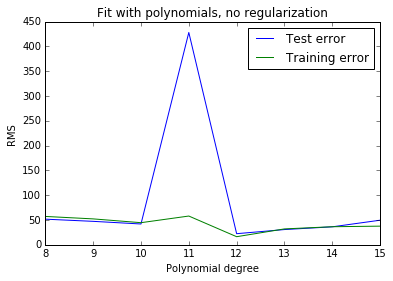

In [6]:
plt.plot(test_err.keys(), test_err.values())
plt.plot(train_err.keys(), train_err.values())
plt.ylabel('RMS')
plt.legend(['Test error','Training error'])
plt.title('Fit with polynomials, no regularization')
plt.xlabel('Polynomial degree')
plt.show()

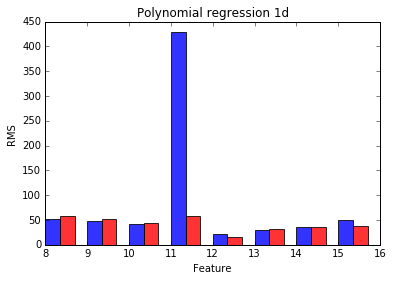

In [7]:
index = np.arange(7, 15) + 1

bar_width = 0.35
opacity = 0.8

plt.bar(index, test_err.values(), bar_width, alpha=opacity, color='b', label='Testing Error')
plt.bar(index + bar_width, train_err.values(), bar_width, alpha=opacity, color='r', label="Training Error")
plt.ylabel('RMS')
# plt.legend(['Test error','Training error'])
plt.title('Polynomial regression 1d')
plt.xlabel('Feature')
# plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.show()